In [34]:
import numpy as np
from scipy.integrate import odeint, solve_ivp
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML
import matplotlib
matplotlib.rcParams['animation.embed_limit'] = 2**128

In [35]:
class sir_model_sim():
    def __init__(self, beta, N, D, delta):
        
        self.beta = beta
        self.N = N
        self.D = D
        self.gamma = 1./D
        self.delta = delta
        
    
    def dy_dt(self,t,y):
        """
        This function returns the right-hand side of the diffeq: 
        [dSdt, dEdt,dIdt,dRdt]
        
        Parameters
        ----------
        t : float
            time 
        y : float
            A 4-component vector S E I R
            
        Returns
        -------
        
        """
        return [-self.beta*y[2]*y[0]/self.N,self.beta*y[2]*y[0]/self.N-self.delta*y[1],
                self.delta*y[1] - self.gamma*y[2], self.gamma*y[2]]
    
    def solve_ode(self, t_pts, S_0, E_0, I_0, R_0, 
                  abserr=1.0e-9, relerr=1.0e-9):
        
        y = [S_0, E_0, I_0, R_0] 
        solution = solve_ivp(self.dy_dt, (t_pts[0], t_pts[-1]), 
                             y, t_eval=t_pts, 
                             atol=abserr, rtol=relerr)
        S,E,I,R = solution.y

        return S,E,I,R
        

In [36]:
def plot_y_vs_x(x, y, axis_labels=None, label=None, title=None, 
                color=None, linestyle=None, semilogy=False, loglog=False,
                ax=None):
    if ax is None:        # if the axis object doesn't exist, make one
        ax = plt.gca()

    if (semilogy):
        line, = ax.semilogy(x, y, label=label, 
                            color=color, linestyle=linestyle)
    elif (loglog):
        line, = ax.loglog(x, y, label=label, 
                          color=color, linestyle=linestyle)
    else:
        line, = ax.plot(x, y, label=label, 
                    color=color, linestyle=linestyle)

    if label is not None:    # if a label if passed, show the legend
        ax.legend()
    if title is not None:    # set a title if one if passed
        ax.set_title(title)
    if axis_labels is not None:  # set x-axis and y-axis labels if passed  
        ax.set_xlabel(axis_labels[0])
        ax.set_ylabel(axis_labels[1])

    return ax, line

In [37]:
def start_stop_indices(t_pts, plot_start, plot_stop):
    start_index = (np.fabs(t_pts-plot_start)).argmin()  # index in t_pts array 
    stop_index = (np.fabs(t_pts-plot_stop)).argmin()  # index in t_pts array 
    return start_index, stop_index

In [57]:
# input initial condition S_0 E_0 I_0 R_0 for simulation

S_0, E_0, I_0, R_0 = 20000,1,0,0

N =2000.
beta = 3.
D = 17.
delta = 1./3.

t_start = 0.
t_end = 100.
delta_t = 0.01

t_pts = np.arange(t_start, t_end+delta_t, delta_t)  
sir1 = sir_model_sim(beta, N, D, delta)
S,E,I,R = sir1.solve_ode(t_pts, S_0, E_0, I_0, R_0)
print(len(S),len(E),len(I),len(R),len(t_pts))

10001 10001 10001 10001 10001


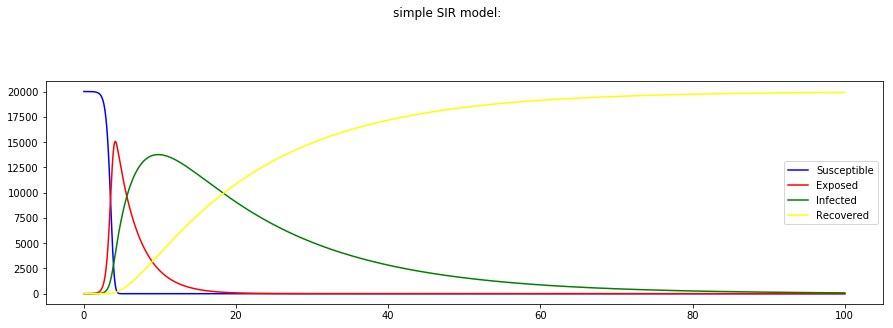

In [66]:
fig = plt.figure(figsize=(15,9))
overall_title = 'simple SIR model:  '     # \n means a new line (adds some space here)
fig.suptitle(overall_title, va='baseline')
    
# first plot: phi plot 
ax_a = fig.add_subplot(2,1,1)                     
line, = ax_a.plot(t_pts, S, label='Susceptible', 
                    color='blue')
line, = ax_a.plot(t_pts, E, label='Exposed', 
                    color='red')

line, = ax_a.plot(t_pts, I, label='Infected', 
                    color='green')
line, = ax_a.plot(t_pts, R, label='Recovered', 
                    color='yellow')
ax_a.legend()

In [67]:
%%capture

fig = plt.figure()
overall_title = 'SIR model for Covid-19:'     # \n means a new line (adds some space here)
fig.suptitle(overall_title)
ax = fig.add_subplot(111, autoscale_on=False, xlim=(-5, 30), ylim=(-2, 22000))
ax.set_aspect('auto')
ax.grid()

line, = ax.plot([], [],'-', lw=2,label='Susceptible')
line1, = ax.plot([], [], '-', lw=2,label='Exposed')
line2, = ax.plot([], [], '-', lw=2,label='Infected')
line3, = ax.plot([], [], '-', lw=2,label='Recovered')
time_template = 'time = %.1fdays'
ax.legend()
time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)
thisx_sA,thisy_sA = [],[]
thisx_eA,thisy_eA = [],[]
thisx_iA,thisy_iA = [],[]
thisx_rA,thisy_rA = [],[]

def init():
    line.set_data([], [])
    line1.set_data([], [])
    line2.set_data([], [])
    line3.set_data([], [])
    time_text.set_text('')
    
    return line,line1,line2,line3, time_text


def anim(i):
    iskip = i
    
    thisx_s = [t_pts[i]]
    thisy_s = [S[i]]
    thisx_sA.append(thisx_s)
    thisy_sA.append(thisy_s) 
    
    thisx_e = [t_pts[i]]
    thisy_e = [E[i]]
    thisx_eA.append(thisx_e)
    thisy_eA.append(thisy_e) 
    
    thisx_i = [t_pts[i]]
    thisy_i = [I[iskip]]
    thisx_iA.append(thisx_i)
    thisy_iA.append(thisy_i) 
    
    thisx_r = [t_pts[i]]
    thisy_r = [R[i]]
    thisx_rA.append(thisx_r)
    thisy_rA.append(thisy_r) 
    
    
    line.set_data(thisx_sA, thisy_sA)
    line1.set_data(thisx_eA, thisy_eA)
    line2.set_data(thisx_iA, thisy_iA)
    line3.set_data(thisx_rA, thisy_rA)
    
    time_text.set_text(time_template % (iskip*delta_t))
    return line,line1,line2,line3, time_text


In [68]:
frame_interval = 1.  # time between frames
frame_number = 2500   # number of frames to include (index of t_pts)
anim = animation.FuncAnimation(fig, 
                               anim, 
                               init_func=init,
                               frames=frame_number, 
                               interval=frame_interval, 
                               blit=True,
                               repeat=False)

In [ ]:
HTML(anim.to_jshtml()) 